In [9]:
import sys
import os

current_path = notebook_dir = os.getcwd()
working_dir = os.path.abspath(os.path.join(current_path, '..','..'))
if working_dir not in sys.path:
    sys.path.insert(0, working_dir)

import pandas as pd
import torch
import pickle
from argparse import Namespace
import re 
L_Apps = ['Apple_Video','Google_Play_Store','Google_Maps','Web_Clothes','Uber', 'Twitter',
        'Microsoft_Mail', 'Microsoft_Store', 'Apple_Music', 'Microsoft_Office', 'Pokemon_GO', 'Clash_of_Clans', 'Yahoo_Mail', 'PlayStation',
        'Wikipedia', 'Apple_Web_Services', 'Pinterest', 'Web_Ads', 'Google_Mail', 'Google_Meet',
        'Apple_Siri', 'Web_Adult', 'Spotify', 'Deezer', 'Waze', 'Web_Games', 'Apple_App_Store', 'Microsoft_Skydrive', 'Google_Docs', 'Microsoft_Web_Services',
        'Molotov', 'YouTube', 'Apple_iTunes', 'Apple_iMessage', 'DailyMotion', 'Netflix', 'Web_Transportation',
        'Web_Downloads', 'SoundCloud', 'TeamViewer', 'Google_Web_Services', 'Facebook', 'EA_Games', 'Tor', 'Amazon_Web_Services',
        'Web_e-Commerce', 'Telegram', 'Apple_Mail','Dropbox', 'Web_Food', 'Apple_iCloud', 'Skype', 'Facebook_Messenger', 'Twitch', 'Microsoft_Azure',
        'Instagram', 'Facebook_Live', 'Web_Streaming', 'Orange_TV', 'Periscope', 'Snapchat' ,'Web_Finance' ,'WhatsApp', 'Web_Weather','Google_Drive','LinkedIn','Yahoo','Fortnite']


def get_df_results(trial_id,model_args,L_Apps,split_key = 'eps100_'):
    df = pd.DataFrame(columns = ['mse','mae','mape','fold','id','trial_num'])
    for app in L_Apps:
        best_model_names = [name for name in model_args['model'].keys() if (f"{trial_id}_{app}_f" in name) or (f"{trial_id}_{app}_1_f" in name) or (f"{trial_id}_{app}_2_f" in name)]

        if len(best_model_names)>5:
            print(best_model_names)
            best_model_names = best_model_names[:5]

        for k,selected_model_name in enumerate(best_model_names):
            model_metrics = model_args['model'][selected_model_name]['performance']['test_metrics']
            app_num = best_model_names[0].split(split_key)[-1].split('_f')[0]
            if (not '_1' in app_num ) and (not '_2' in app_num):
                app_num = app_num+ '_1'
            name_id = '_'.join(app_num.split('_')[:-1])
            trial_num = app_num.split('_')[-1]

            df.loc[len(df)] = [model_metrics['mse'],model_metrics['mae'],model_metrics['mape'],k,name_id,trial_num]
    return df 



In [10]:
folder_name = 're_validation_epsilon100'
save_path = f'save/K_fold_validation/training_with_HP_tuning/{folder_name}/best_models'
model_args = pickle.load(open(f'{current_path}/{save_path}/model_args.pkl','rb'))
trial_id = 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100'

df1 = get_df_results(trial_id,model_args,L_Apps)

folder_name = 're_validation'
save_path = f'save/K_fold_validation/training_with_HP_tuning/{folder_name}/best_models'
model_args = pickle.load(open(f'{current_path}/{save_path}/model_args.pkl','rb'))
trial_id = 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100'

df2 = get_df_results(trial_id,model_args,L_Apps)
df = pd.concat([df1,df2])

['subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_f0', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_f1', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_f2', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_f3', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_fcomplete_dataset', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_2_f0', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_2_f1', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_2_f2', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_2_f3', 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100_Apple_Video_2_fcomplete_dataset']


In [12]:
df.head()

,mse,mae,mape,fold,id,trial_num
0,1365.452881,21.565752,43.349380,0,Apple_Video,2
1,1329.773315,21.960958,36.967972,1,Apple_Video,2
2,1264.973877,20.838892,30.041185,2,Apple_Video,2
3,1233.327148,20.747341,29.113092,3,Apple_Video,2
4,1296.285156,20.662750,28.951359,4,Apple_Video,2


In [78]:
import pandas as pd
import numpy as np 
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Category10
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, show, output_file, save,output_notebook
from bokeh.models import ColumnDataSource, Toggle, CustomJS,HoverTool, Legend
from bokeh.layouts import layout,row,column


def plot_boxplot_on_metric(df,metric_i='mse',save_path=f"MSE_distribution_per_app_and_per_fold.html"):
    sdf = df.groupby("id")[metric_i].mean().sort_values()
    sdf_ids = sdf.index.tolist()

    df["fold_str"] = df["fold"].astype(str)

    grp = df.groupby("id")[metric_i]
    q1 = grp.quantile(0.25)
    q2 = grp.quantile(0.50)
    q3 = grp.quantile(0.75)
    mn = grp.min()
    mx = grp.max()
    stats = pd.DataFrame({
        "id": q1.index,
        "min_v": mn.values,
        "q1": q1.values,
        "median_v": q2.values,
        "q3": q3.values,
        "max_v": mx.values
    })
    source_box = ColumnDataSource(stats)
    source_points = ColumnDataSource(df)

    sdf = df.groupby("id")[metric_i].mean().sort_values()
    sdf_ids = sdf.index.tolist()

    p = figure(
        x_range=sdf_ids, #sorted(df["id"].unique()),
        width=1200, height=400,
        title=f"{metric_i} distribution per app and per folds"
    )
    box_width = 0.2

    p.segment("id","max_v","id","q3", source=source_box, line_width=1,line_color = 'black')
    p.segment("id","min_v","id","q1", source=source_box, line_width=1,line_color = 'black')
    p.vbar("id", box_width, "median_v", "q3", source=source_box, line_width=2,fill_color = 'grey',fill_alpha = 0.3,line_color = 'black')
    p.vbar("id", box_width, "q1", "median_v", source=source_box, line_width=2,fill_color = 'grey',fill_alpha = 0.3,line_color = 'black')
    #p.rect("id","median_v", box_width, 0, source=source_box)

    palette = Category10[len(df["fold_str"].unique())]
    p.circle(
        x="id", y=metric_i,
        source=source_points,
        size=7,
        line_color="black",
        fill_color=factor_cmap("fold_str", palette=palette, factors=df["fold_str"].unique()),
        legend_group="fold_str"
    )

    p.xaxis.axis_label = "App"
    p.yaxis.axis_label = metric_i
    p.xaxis.major_label_orientation = np.pi/2
    p.legend.title = "Fold"
    output_notebook()
    show(p)

    if save_path is not None:
        output_file(save_path)
        save(p)

#save_path=f"MSE_distribution_per_app_and_per_fold.html"
save_path = f"MASE_distribution_per_app_and_per_fold.html"
metric_i = 'mase'
plot_boxplot_on_metric(csv_with_mase,metric_i,save_path)

save_path = f"MAE_distribution_per_app_and_per_fold.html"
metric_i = 'mae'
plot_boxplot_on_metric(csv_with_mase,metric_i,save_path)

save_path = f"MSE_distribution_per_app_and_per_fold.html"
metric_i = 'mse'
plot_boxplot_on_metric(csv_with_mase,metric_i,save_path)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

In [37]:
import numpy as np 
import pickle 

import sys
import os

current_path = notebook_dir = os.getcwd()
working_dir = os.path.abspath(os.path.join(current_path, '..','..'))
if working_dir not in sys.path:
    sys.path.insert(0, working_dir)
    
from high_level_DL_method import load_model,load_optimizer_and_scheduler
from trainer import Trainer
from examples.train_and_visu_non_recurrent import get_multi_ds
from utils.metrics import evaluate_metrics

# Init 

if False:
    folder_name = 're_validation_epsilon100'

if True:
    folder_name = 're_validation'
    
save_path = f'save/K_fold_validation/training_with_HP_tuning/{folder_name}/best_models'
model_args = pickle.load(open(f'{current_path}/{save_path}/model_args.pkl','rb'))
trial_id = 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271NETMOB_eps100'


def load_trained_model(selected_model_path,ds,model_fold_i):
    model_param = torch.load(selected_model_path)
    args = model_args['model'][model_fold_i]['args']
    args = Namespace(**args)
    model = load_model(ds, args)
    model.load_state_dict(model_param['state_dict'])
    optimizer,scheduler,loss_function = load_optimizer_and_scheduler(model,args)
    trainer = Trainer(ds,model,args,optimizer,loss_function,scheduler = scheduler)
    return trainer 

def get_metrics_from_test(trainer,ds,metric_list = ['mse','mae','mape','mase']):
    Preds,Y_true,T_labels = trainer.testing(ds.normalizer)
    dic_pred_metrics = evaluate_metrics(Preds,Y_true,metric_list)
    return dic_pred_metrics

pandas_total_results = pd.DataFrame()
for app_ind,app in enumerate(L_Apps):
    print('avancement: ',(app_ind+1)/len(L_Apps))
    best_model_names = [name for name in model_args['model'].keys() if (f"{trial_id}_{app}_f" in name) or (f"{trial_id}_{app}_1_f" in name) or (f"{trial_id}_{app}_2_f" in name)]
    if len(best_model_names)>5:
        best_model_names=best_model_names[:5]

    ## Load datasets: 
    # Load Args 
    # Use information from first fold to get the inputs (which app, which train/valid/test prop...):
    args_0 = model_args['model'][best_model_names[0]]['args']
    args_0 = Namespace(**args_0)
    args_with_contextual,K_subway_ds = get_multi_ds(args_0.model_name, args_0.dataset_names,args_0.dataset_for_coverage,args_init = args_0,fold_to_evaluate = np.arange(args_0.K_fold))
    # ...
    ## ====

    # With the already load ds, load now the trained model. And ds is ready for the evaluation:
    for k_fold,model_fold_i in enumerate(best_model_names):
        # Load trained param: 
        ds = K_subway_ds[k_fold]
        selected_model_path = f"{current_path}/{save_path}/{model_fold_i}.pkl"
        
        # Model :
        trainer = load_trained_model(selected_model_path,ds,model_fold_i)

        # get metrics : 
        dic_pred_metrics = get_metrics_from_test(trainer,ds,metric_list = ['mse','mae','mape','mase'])

        pd_local_results = pd.DataFrame(dict(mse = [dic_pred_metrics['mse']],mase = [dic_pred_metrics['mase']],mae = [dic_pred_metrics['mae']], mape = [dic_pred_metrics['mape']],
                                            fold = [k_fold], id = [app], trial_num = [2] if 'eps' in folder_name else [1]))
        pandas_total_results = pd.concat([pandas_total_results,pd_local_results])
       


avancement:  0.014705882352941176
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Invalid dates within this fold: 776

Init Dataset: 'torch.Size([7392, 40]) with 295680 Total nb of elements and 0 Nan values
nb subway_in invalid dates:  776
Netmob_T.size():  torch.Size([7392, 40])
vision_input_type POIs
vision_model_name None
2821 train samples had been added thank to Data Augmentation
calendar data augmented by dupplication but not modified
Train/Target size:  torch.Size([5642, 40, 7]) torch.Size([5642, 40, 1])
Init U/Utarget size: torch.Size([4702, 40, 7])/torch.Size([4702, 40, 1]) Train/Valid/Test 5642 940 940

 ===== ERROR WITH prefetch_factor====  
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing
Invalid dates within this fold: 481
Considered Spatial-Unit:  Index(['AMP', 'BEL', 'BRO', 'COR', 'CUI', 'CUS', 'FLA', 'GOR', 'BLA', 'GRA',
       'GUI', 'GIL', 'HEN', 'HOT', 'LAE', 'MAS', 'MER', 'LUM', 'PRY', 'PER

In [40]:
csv_with_mase = pd.concat([pandas_total_results,pandas_total_results_2])
csv_with_mase

,mse,mase,mae,mape,fold,id,trial_num
0,1349.168945,0.764059,21.702271,44.978340,0,Apple_Video,1
0,1319.700439,0.721664,21.785254,36.126171,1,Apple_Video,1
0,1292.140625,0.661125,20.880156,29.489262,2,Apple_Video,1
0,1237.414062,0.657570,21.126162,30.085606,3,Apple_Video,1
0,1312.582520,0.644155,20.626852,30.769630,4,Apple_Video,1
...,...,...,...,...,...,...,...
0,1356.251343,0.760964,21.611626,41.249344,0,Fortnite,2
0,1346.689209,0.728087,21.977318,35.015217,1,Fortnite,2
0,1304.612793,0.673325,21.265333,30.248672,2,Fortnite,2
0,1212.446411,0.633767,20.363184,26.443586,3,Fortnite,2


In [ ]:
#csv_with_mase.to_csv('training_netmob_metric_tabs_concat.csv')
#pandas_total_results.to_csv('training_netmob_metric_tabs_1.csv')
#pandas_total_results.to_csv('training_netmob_metric_tabs_2.csv')

In [36]:
pandas_total_results_2

,mse,mase,mae,mape,fold,id,trial_num
0,1365.452881,0.759169,21.565752,43.349380,0,Apple_Video,2
0,1329.773315,0.727521,21.960958,36.967972,1,Apple_Video,2
0,1264.973877,0.659811,20.838892,30.041185,2,Apple_Video,2
0,1233.327148,0.645517,20.747341,29.113092,3,Apple_Video,2
0,1296.285156,0.645276,20.662750,28.951359,4,Apple_Video,2
...,...,...,...,...,...,...,...
0,1356.251343,0.760964,21.611626,41.249344,0,Fortnite,2
0,1346.689209,0.728087,21.977318,35.015217,1,Fortnite,2
0,1304.612793,0.673325,21.265333,30.248672,2,Fortnite,2
0,1212.446411,0.633767,20.363184,26.443586,3,Fortnite,2


In [19]:
pd_local_results

,mse,mase,mae,mape,fold,id,trial_num
0,1365.452881,0.759169,21.565752,43.34938,0,Apple_Video,2


<Axes: >

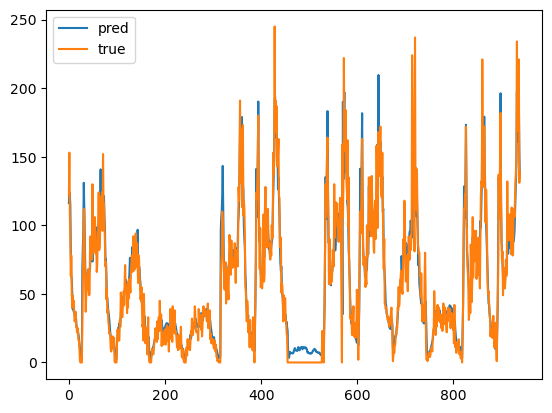

In [20]:
import pandas as pd
pd.DataFrame(dict(pred= Preds[:,0,0],true = Y_true[:,0,0])).plot()